In [1]:
import tensorflow as tf
import keras
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# fix random seed for reproducibility
seed = 100
np.random.seed(seed)

# Stat 280 (Deep Learning) Assignment 1
- Gerard Ompad
- Student ID: 2017-90388

## Assignment 1 (Problem 1)

## 1. Get the dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## 2. Check number of unique labels

In [15]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 3. Get the corresponding classes

In [16]:
# taken from https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 4. Check the data

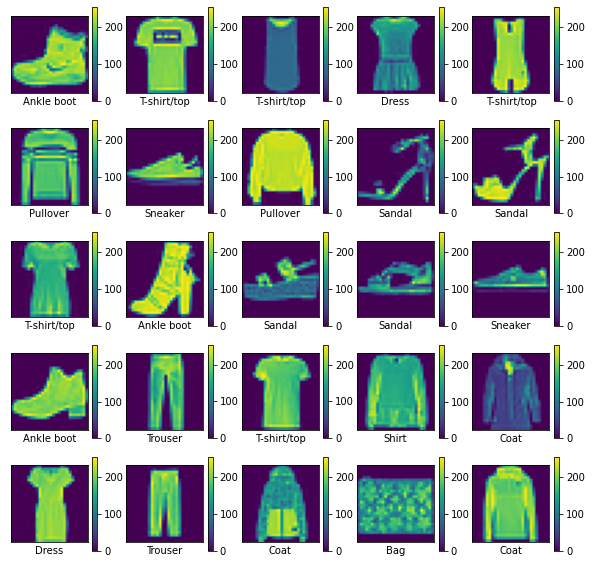

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

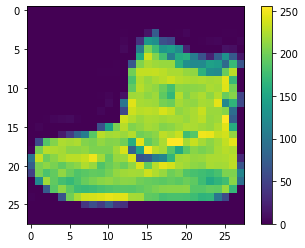

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
#checking image dimension for test and train data
print('training data: ', train_images.shape)
print('testing data: ', test_images.shape)

training data:  (60000, 28, 28)
testing data:  (10000, 28, 28)


## 5. Preprocess the dataset

From the image above the pixel values ranges from 0 to 250 and must need to be preprocessed from 0 to 1.

In [20]:
#One hot encode the values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

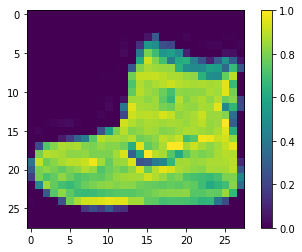

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [22]:
# Check image scaling after preprocessing
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print((train_labels[0]))

## 6. Create the model

In [28]:
'''input layer transforms the format of the images from a two-dimensional array (of 28 by 28 pixels)
to a one-dimensional array (of 28 * 28 = 784 pixels).
two hidden layers with 64 node and RELU activation

'''
tf.random.set_seed(seed)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')])

# Compile model
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics=['accuracy'])

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6244 - accuracy: 0.7814 - val_loss: 0.4574 - val_accuracy: 0.8359
Epoch 2/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8446 - val_loss: 0.4074 - val_accuracy: 0.8497
Epoch 3/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8585 - val_loss: 0.3752 - val_accuracy: 0.8652
Epoch 4/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8692 - val_loss: 0.3531 - val_accuracy: 0.8726
Epoch 5/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8768 - val_loss: 0.3487 - val_accuracy: 0.8751
Epoch 6/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8831 - val_loss: 0.3587 - val_accuracy: 0.8691
Epoch 7/100
375/375 [==============================] - 0s 1ms/step - loss: 0.3057 - accuracy: 0.8842 - val_loss: 0.3324 - val_accuracy: 0.8819

Epoch 58/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9569 - val_loss: 0.5557 - val_accuracy: 0.8818
Epoch 59/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1148 - accuracy: 0.9571 - val_loss: 0.5447 - val_accuracy: 0.8872
Epoch 60/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9579 - val_loss: 0.5602 - val_accuracy: 0.8799
Epoch 61/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9594 - val_loss: 0.5508 - val_accuracy: 0.8860
Epoch 62/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9604 - val_loss: 0.6279 - val_accuracy: 0.8734
Epoch 63/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1089 - accuracy: 0.9591 - val_loss: 0.6255 - val_accuracy: 0.8840
Epoch 64/100
375/375 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.9603 - val_loss: 0.5887 - val_accuracy:

## 7. Model training

In [30]:
tf.random.set_seed(seed)
history = model.fit(train_images, train_labels,validation_split=0.2,epochs=100,batch_size= 128)

Epoch 1/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0586 - accuracy: 0.9792 - val_loss: 1.1450 - val_accuracy: 0.8769
Epoch 2/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9792 - val_loss: 1.1252 - val_accuracy: 0.8804
Epoch 3/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9795 - val_loss: 1.1266 - val_accuracy: 0.8803
Epoch 4/100
375/375 [==============================] - 1s 1ms/step - loss: 0.0605 - accuracy: 0.9786 - val_loss: 1.1708 - val_accuracy: 0.8788
Epoch 5/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9786 - val_loss: 1.1674 - val_accuracy: 0.8803
Epoch 6/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9800 - val_loss: 1.2018 - val_accuracy: 0.8814
Epoch 7/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9792 - val_loss: 1.2249 - val_accuracy: 0.8793

Epoch 58/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9835 - val_loss: 1.5719 - val_accuracy: 0.8802
Epoch 59/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9841 - val_loss: 1.6651 - val_accuracy: 0.8783
Epoch 60/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9845 - val_loss: 1.5781 - val_accuracy: 0.8788
Epoch 61/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0484 - accuracy: 0.9843 - val_loss: 1.5966 - val_accuracy: 0.8760
Epoch 62/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9844 - val_loss: 1.5403 - val_accuracy: 0.8782
Epoch 63/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 1.6278 - val_accuracy: 0.8782
Epoch 64/100
375/375 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9843 - val_loss: 1.6251 - val_accuracy:

### 8. Plot accucarcy and loss

In [35]:
# summarize history for accuracy
import plotly.graph_objects as go
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(len(history.history['accuracy']))], y=history.history['accuracy']
                         ,mode='lines',name='Accuracy'))
fig.add_trace(go.Scatter(x=[i for i in range(len(history.history['val_accuracy']))], y=history.history['val_accuracy']
                         ,mode='lines+markers',name='Validation Accuracy'))
fig.add_trace(go.Scatter(x=[i for i in range(len(history.history['loss']))], y=history.history['loss']
                         ,mode='lines',name='Loss'))
fig.add_trace(go.Scatter(x=[i for i in range(len(history.history['val_loss']))], y=history.history['val_loss']
                         ,mode='lines+markers',name='Validation Loss')) 
fig.show()

Rationale: The idea here is to show the performance of the model per epoch. This plot will show what epoch obtained a peak performance, and on what epoch will the performance starts to deteriorate. The graph above shows behavior of overfitting.

From this graph, thhe lowest validation loss is observed at epoch = 2.

### 10. Generate predictions

In [37]:
tf.random.set_seed(seed)
model.fit(train_images, train_labels,validation_split=0.2,epochs=2,batch_size= 128)
pred =  np.round(model.predict(test_images))

Epoch 1/2
375/375 [==============================] - 1s 1ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 1.9113 - val_accuracy: 0.8799
Epoch 2/2
375/375 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9864 - val_loss: 1.8806 - val_accuracy: 0.8749


### 11. Determine performance metrics

In [38]:
from sklearn import metrics
metrics.accuracy_score(test_labels, pred)

0.8729

In [39]:
print(metrics.classification_report(test_labels, pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.84      0.79      1000
           3       0.87      0.88      0.88      1000
           4       0.82      0.75      0.78      1000
           5       0.95      0.96      0.96      1000
           6       0.68      0.71      0.70      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.95      0.96      1000
           9       0.97      0.93      0.95      1000

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000
 samples avg       0.87      0.87      0.87     10000



For Assignment 1 Problem 1, the accuracy of the architecture is 87.29 %, the precision and recall are also high indicating that this architecture can identify true positives for each class.

## Assignment 1 (Problem 2: Expirement 1)

### 1. Finding optimal number of hidden layers

A k = 5 split cross validation was performed to determine how many neurons, what activiation and how many hidden payers is optimal for this dataset.

In [43]:
tf.random.set_seed(seed)
def create_model(neurons = 1, activation='relu',hidden_layers=1):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    for i in range(hidden_layers):
        # Add one hidden layer
        model.add(Dense(units=neurons, activation=activation))
        
    # Add an output layer 
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
hidden_layers = [2,4,6,8,10,12]
neurons = [30,35,40,45,50,55,60,65,70]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(neurons = neurons,activation=activation,hidden_layers= hidden_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 3s 1ms/step - loss: 0.5251 - accuracy: 0.8113 - val_loss: 0.4222 - val_accuracy: 0.8453
Best: 0.846300 using {'activation': 'relu', 'hidden_layers': 2, 'neurons': 70}
0.613300 (0.070153) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 30}
0.587233 (0.070474) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 35}
0.562567 (0.106536) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 40}
0.629617 (0.024968) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 45}
0.524200 (0.087393) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 50}
0.621517 (0.038752) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 55}
0.639217 (0.078471) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 60}
0.633900 (0.027140) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 65}
0.590567 (0.071278) with: {'activation': 'softmax', 'hidden_layers': 2, 'neurons': 70}
0.196

### 2. Finding activation for the end layer

Using the results from the previous experiment, a k = 5 split cross validation was performed to determine what activation is optimal for the last layer.

In [19]:
tf.random.set_seed(seed)
def create_model(activation='softmax'):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(65, activation='tanh'),
        tf.keras.layers.Dense(65, activation='tanh'),
        tf.keras.layers.Dense(10,activation=activation)])
    model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 2s 1ms/step - loss: 0.6442 - accuracy: 0.7720 - val_loss: 0.4279 - val_accuracy: 0.8445
Best: 0.850600 using {'activation': 'sigmoid'}
0.843617 (0.006988) with: {'activation': 'softmax'}
0.841400 (0.005508) with: {'activation': 'softplus'}
0.092317 (0.028675) with: {'activation': 'softsign'}
0.100000 (0.003421) with: {'activation': 'relu'}
0.156267 (0.046856) with: {'activation': 'tanh'}
0.850600 (0.006104) with: {'activation': 'sigmoid'}
0.775950 (0.038267) with: {'activation': 'hard_sigmoid'}
0.154433 (0.042534) with: {'activation': 'linear'}


### 3. Finding regularization

Using the results from the previous experiment, a k = 5 split cross validation was performed to determine what activation is optimal regularization function.

In [20]:
np.random.seed(seed)
def create_model( kernel_regularizer=tf.keras.regularizers.l1(0.001)):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= kernel_regularizer),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= kernel_regularizer),
        tf.keras.layers.Dense(10,activation='sigmoid')])
    model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
kernel_regularizer = ['l1','l2','L1L2']
param_grid = dict(kernel_regularizer = kernel_regularizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 2s 1ms/step - loss: 0.6489 - accuracy: 0.7724 - val_loss: 0.4120 - val_accuracy: 0.8468
Best: 0.840383 using {'kernel_regularizer': 'L1L2'}
0.732817 (0.004837) with: {'kernel_regularizer': 'l1'}
0.808333 (0.012835) with: {'kernel_regularizer': 'l2'}
0.840383 (0.005289) with: {'kernel_regularizer': 'L1L2'}


### 4. Finding optimal dropout

Using the results from the previous experiment, a k = 5 split cross validation was performed to determine the optimal drop out rate.

In [21]:
np.random.seed(seed)
def create_model( dropout_rate=0.0):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10,activation='sigmoid')])
    model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 2s 1ms/step - loss: 0.6773 - accuracy: 0.7577 - val_loss: 0.4241 - val_accuracy: 0.8472
Best: 0.845417 using {'dropout_rate': 0.2}
0.841383 (0.005521) with: {'dropout_rate': 0.0}
0.843833 (0.010758) with: {'dropout_rate': 0.1}
0.845417 (0.003951) with: {'dropout_rate': 0.2}
0.838533 (0.007353) with: {'dropout_rate': 0.3}
0.834150 (0.013363) with: {'dropout_rate': 0.4}
0.834983 (0.008566) with: {'dropout_rate': 0.5}
0.830200 (0.011049) with: {'dropout_rate': 0.6}
0.833817 (0.002710) with: {'dropout_rate': 0.7}
0.829633 (0.003891) with: {'dropout_rate': 0.8}
0.809783 (0.008368) with: {'dropout_rate': 0.9}


### 5. Finding optimal optimizer

Using the results from the previous experiment, a k = 5 split cross validation was performed to determine the best optimizer.

In [22]:
np.random.seed(seed)
def create_model(optimizer = "rmsprop"):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(10,activation='sigmoid')])
    model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 3s 1ms/step - loss: 0.6650 - accuracy: 0.7691 - val_loss: 0.3917 - val_accuracy: 0.8577
Best: 0.850200 using {'optimizer': 'Nadam'}
0.801300 (0.002973) with: {'optimizer': 'SGD'}
0.843867 (0.006624) with: {'optimizer': 'RMSprop'}
0.713183 (0.007137) with: {'optimizer': 'Adagrad'}
0.253183 (0.041405) with: {'optimizer': 'Adadelta'}
0.849967 (0.006851) with: {'optimizer': 'Adam'}
0.837017 (0.003146) with: {'optimizer': 'Adamax'}
0.850200 (0.004517) with: {'optimizer': 'Nadam'}


The optimal learning rate was also determine using k=5 cross validation

In [23]:
np.random.seed(seed)
from keras.optimizers import Nadam
def create_model(learn_rate=0.01):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(10,activation='sigmoid')])
    optimizer = Nadam(lr=learn_rate)
    model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
learn_rate = [0.00001, 0.0001,0.001,0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate = learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



1500/1500 [==============================] - 2s 1ms/step - loss: 0.6532 - accuracy: 0.7740 - val_loss: 0.4189 - val_accuracy: 0.8489
Best: 0.843367 using {'learn_rate': 0.001}
0.650200 (0.008265) with: {'learn_rate': 1e-05}
0.806550 (0.004380) with: {'learn_rate': 0.0001}
0.843367 (0.003101) with: {'learn_rate': 0.001}
0.788400 (0.009394) with: {'learn_rate': 0.01}
0.100400 (0.002020) with: {'learn_rate': 0.1}
0.101800 (0.001083) with: {'learn_rate': 0.2}
0.100767 (0.001045) with: {'learn_rate': 0.3}


### 6. Finding optimal batch and epochs

Using the results from the previous experiment, a k = 5 split cross validation was performed to determine the optimal number of batches and epochs.

In [24]:
np.random.seed(seed)
from keras.optimizers import Nadam
def create_model():
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(10,activation='sigmoid')])
    optimizer = Nadam(lr=0.001)
    model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
batch_size = [100,200,300,400,500]
epochs = [10, 50, 100,200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/50
96/96 [==============================] - 1s 5ms/step - loss: 1.1760 - accuracy: 0.6281 - val_loss: 0.5423 - val_accuracy: 0.8022
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.8253 - val_loss: 0.4470 - val_accuracy: 0.8403
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8460 - val_loss: 0.4146 - val_accuracy: 0.8508
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8530 - val_loss: 0.4065 - val_accuracy: 0.8524
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8644 - val_loss: 0.3787 - val_accuracy: 0.8626
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8706 - val_loss: 0.3809 - val_accuracy: 0.8585
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8784 - val_loss: 0.3561 - val_accuracy: 0.8702
Epoch 8/50
96/96 [==

### 7. Train and test optimized model

In [30]:
np.random.seed(seed)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
    tf.keras.layers.Dense(units = 65, activation='tanh',  kernel_regularizer= 'L1L2'),
    tf.keras.layers.Dense(10,activation='sigmoid')])
optimizer = Nadam(lr=0.001)
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
history = model.fit(train_images, train_labels,validation_split=0.2,epochs=50,batch_size= 500)

Epoch 1/50
96/96 [==============================] - 1s 4ms/step - loss: 1.1523 - accuracy: 0.6349 - val_loss: 0.5235 - val_accuracy: 0.8207
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.8243 - val_loss: 0.4460 - val_accuracy: 0.8453
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.8446 - val_loss: 0.4264 - val_accuracy: 0.8498
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8548 - val_loss: 0.4147 - val_accuracy: 0.8497
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8621 - val_loss: 0.3790 - val_accuracy: 0.8633
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.8662 - val_loss: 0.3741 - val_accuracy: 0.8668
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8765 - val_loss: 0.3765 - val_accuracy: 0.8640
Epoch 8/50
96/96 [==

### 8. Determine the performance metrics

It can be seen that the model did not overfit.

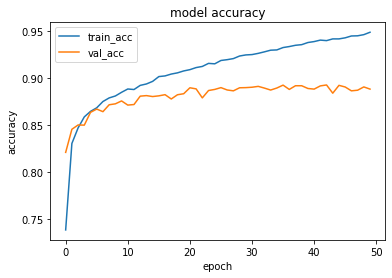

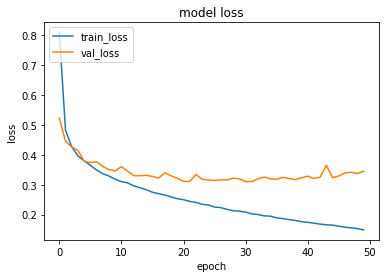

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

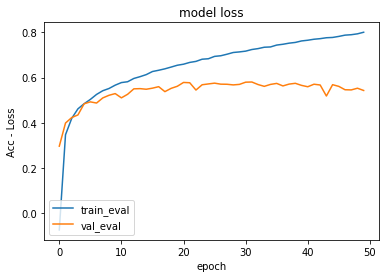

In [32]:
# summarize history for loss
import pandas as pd
train_val = pd.DataFrame(history.history['accuracy']) - pd.DataFrame(history.history['loss'])
train_val = train_val.values.tolist()
test_val = pd.DataFrame(history.history['val_accuracy']) - pd.DataFrame(history.history['val_loss'])
test_val = test_val.values.tolist()
plt.plot(train_val)
plt.plot(test_val)
plt.title('model loss')
plt.ylabel('Acc - Loss')
plt.xlabel('epoch')
plt.legend(['train_eval', 'val_eval'], loc='lower left')
plt.show()

In [33]:
pred =  np.round(model.predict(test_images))
print(metrics.accuracy_score(test_labels, pred))
print(metrics.classification_report(test_labels, pred, zero_division=1))

0.0
              precision    recall  f1-score   support

           0       0.21      0.99      0.35      1000
           1       0.45      1.00      0.62      1000
           2       0.15      1.00      0.27      1000
           3       0.22      1.00      0.36      1000
           4       0.18      1.00      0.31      1000
           5       0.30      1.00      0.46      1000
           6       0.18      0.99      0.30      1000
           7       0.32      1.00      0.49      1000
           8       0.33      0.99      0.50      1000
           9       0.46      1.00      0.63      1000

   micro avg       0.25      1.00      0.39     10000
   macro avg       0.28      1.00      0.43     10000
weighted avg       0.28      1.00      0.43     10000
 samples avg       0.26      1.00      0.41     10000



Although the trained model did not overfit, its accuracy against the test dataset is remarkably low compared to the architecture in problem 1, this architecture has a classification accuracy of 0.00. But this model has a very high recall with a low precision metric , this means that the algorithm labels each item correctly, but also labels the other items as such.The algorithm is too liberal in classifying items.

# Assignment 1 (Problem 2: Experiment 2)

Because of the unusual result obtained in experiment 1, another experiment is conducted. In this experiment the activations functions, loss and optimizer is based on the architecture proposed in problem 1. The hidden layer is set to Relu, the last layer is set to softmax, loss is categorical cross entropy and optimizer is rmsprop.


The values of the neurons, layers, drop out and regularizers are set to variable to determine which will optimize the proposed architecture in Problem 1.

### 1. Finding optimal neurons and layers

In [34]:
np.random.seed(seed)
def create_model(neurons = 1, hidden_layers=1):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    for i in range(hidden_layers):
        # Add one hidden layer
        model.add(Dense(units=neurons, activation='relu'))
        
    # Add an output layer 
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
hidden_layers = [2,4,6,8,10,12]
neurons = [30,35,40,45,50,55,60,65,70]
param_grid = dict(neurons = neurons,hidden_layers= hidden_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 2s 1ms/step - loss: 0.6940 - accuracy: 0.7563 - val_loss: 0.4035 - val_accuracy: 0.8561
Best: 0.845067 using {'hidden_layers': 2, 'neurons': 70}
0.834300 (0.006629) with: {'hidden_layers': 2, 'neurons': 30}
0.842250 (0.006858) with: {'hidden_layers': 2, 'neurons': 35}
0.835367 (0.006624) with: {'hidden_layers': 2, 'neurons': 40}
0.835700 (0.007130) with: {'hidden_layers': 2, 'neurons': 45}
0.844167 (0.003787) with: {'hidden_layers': 2, 'neurons': 50}
0.840517 (0.007778) with: {'hidden_layers': 2, 'neurons': 55}
0.838783 (0.009067) with: {'hidden_layers': 2, 'neurons': 60}
0.839700 (0.012626) with: {'hidden_layers': 2, 'neurons': 65}
0.845067 (0.005467) with: {'hidden_layers': 2, 'neurons': 70}
0.824850 (0.011373) with: {'hidden_layers': 4, 'neurons': 30}
0.834017 (0.007153) with: {'hidden_layers': 4, 'neurons': 35}
0.834700 (0.005469) with: {'hidden_layers': 4, 'neurons': 40}
0.833600 (0.010604) with: {'hidden_layers': 4, 'neurons': 45}
0.83

### 2. Finding best regularizer

In [35]:
np.random.seed(seed)
def create_model( kernel_regularizer=tf.keras.regularizers.l1(0.001)):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= kernel_regularizer),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= kernel_regularizer),
        tf.keras.layers.Dense(10,activation='softmax')])
    model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
kernel_regularizer = ['l1','l2','L1L2']
param_grid = dict(kernel_regularizer = kernel_regularizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 2s 960us/step - loss: 0.6937 - accuracy: 0.7544 - val_loss: 0.4349 - val_accuracy: 0.8448
Best: 0.835800 using {'kernel_regularizer': 'L1L2'}
0.709783 (0.017237) with: {'kernel_regularizer': 'l1'}
0.788600 (0.026001) with: {'kernel_regularizer': 'l2'}
0.835800 (0.010095) with: {'kernel_regularizer': 'L1L2'}


### 3. Finding dropout rate

In [36]:
np.random.seed(seed)
def create_model( dropout_rate=0.0):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10,activation='softmax')])
    model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1500/1500 [==============================] - 2s 977us/step - loss: 0.6920 - accuracy: 0.7544 - val_loss: 0.4222 - val_accuracy: 0.8514
Best: 0.848733 using {'dropout_rate': 0.0}
0.848733 (0.005186) with: {'dropout_rate': 0.0}
0.835750 (0.012114) with: {'dropout_rate': 0.1}
0.834583 (0.006432) with: {'dropout_rate': 0.2}
0.837333 (0.008761) with: {'dropout_rate': 0.3}
0.839233 (0.003297) with: {'dropout_rate': 0.4}
0.836567 (0.002758) with: {'dropout_rate': 0.5}
0.830017 (0.006923) with: {'dropout_rate': 0.6}
0.824567 (0.003605) with: {'dropout_rate': 0.7}
0.814183 (0.010824) with: {'dropout_rate': 0.8}
0.782700 (0.006939) with: {'dropout_rate': 0.9}


### 4. Finding the optimal values for RMSprop

In [39]:
np.random.seed(seed)
from keras.optimizers import RMSprop
def create_model(learn_rate=0.01):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(10,activation='softmax')])
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
learn_rate = [0.00001, 0.0001,0.001,0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate = learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


1500/1500 [==============================] - 2s 1ms/step - loss: 0.6694 - accuracy: 0.7612 - val_loss: 0.4287 - val_accuracy: 0.8454
Best: 0.844117 using {'learn_rate': 0.001}
0.595300 (0.043425) with: {'learn_rate': 1e-05}
0.802300 (0.004625) with: {'learn_rate': 0.0001}
0.844117 (0.008161) with: {'learn_rate': 0.001}
0.805550 (0.010258) with: {'learn_rate': 0.01}
0.186550 (0.038296) with: {'learn_rate': 0.1}
0.099683 (0.003412) with: {'learn_rate': 0.2}
0.099117 (0.003025) with: {'learn_rate': 0.3}


### 5. Find the optimal batch size and epoch

In [40]:
np.random.seed(seed)
from keras.optimizers import RMSprop
def create_model():
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(10,activation='softmax')])
    optimizer = RMSprop(lr=0.001)
    model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,validation_split=0.2)

# define the grid search parameters
batch_size = [100,300,500]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/50
160/160 [==============================] - 1s 3ms/step - loss: 1.0067 - accuracy: 0.6622 - val_loss: 0.5258 - val_accuracy: 0.8133
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.8194 - val_loss: 0.4408 - val_accuracy: 0.8429
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8408 - val_loss: 0.4427 - val_accuracy: 0.8421
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8532 - val_loss: 0.4064 - val_accuracy: 0.8547
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8623 - val_loss: 0.3865 - val_accuracy: 0.8632
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8685 - val_loss: 0.4039 - val_accuracy: 0.8493
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8749 - val_loss: 0.3617 - val_accuracy: 0.8692
Epoch 

### 6. Train and test optimized model

In [42]:
np.random.seed(seed)
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(units = 70, activation='relu',  kernel_regularizer= 'L1L2'),
        tf.keras.layers.Dense(10,activation='softmax')])
optimizer = RMSprop(lr=0.001)
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
history = model.fit(train_images, train_labels,validation_split=0.2,epochs=50,batch_size= 300)

Epoch 1/50
160/160 [==============================] - 1s 5ms/step - loss: 0.9330 - accuracy: 0.6884 - val_loss: 0.5060 - val_accuracy: 0.8202
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8193 - val_loss: 0.4368 - val_accuracy: 0.8432
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8430 - val_loss: 0.4201 - val_accuracy: 0.8533
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8555 - val_loss: 0.4197 - val_accuracy: 0.8493
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.8675 - val_loss: 0.4114 - val_accuracy: 0.8489
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8710 - val_loss: 0.4070 - val_accuracy: 0.8488
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8771 - val_loss: 0.3782 - val_accuracy: 0.8648
Epoch 

### 7. determine the performance of the model

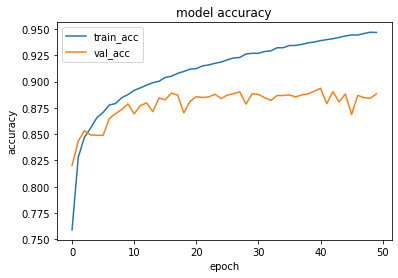

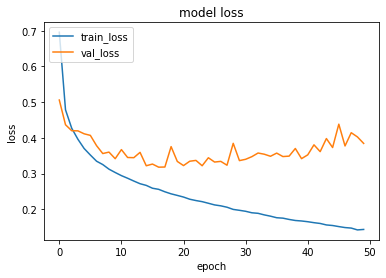

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

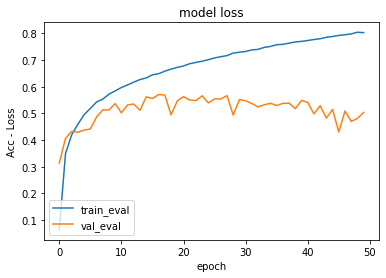

In [44]:
# summarize history for loss
import pandas as pd
train_val = pd.DataFrame(history.history['accuracy']) - pd.DataFrame(history.history['loss'])
train_val = train_val.values.tolist()
test_val = pd.DataFrame(history.history['val_accuracy']) - pd.DataFrame(history.history['val_loss'])
test_val = test_val.values.tolist()
plt.plot(train_val)
plt.plot(test_val)
plt.title('model loss')
plt.ylabel('Acc - Loss')
plt.xlabel('epoch')
plt.legend(['train_eval', 'val_eval'], loc='lower left')
plt.show()

In [45]:
pred =  np.round(model.predict(test_images))
print(metrics.accuracy_score(test_labels, pred))
print(metrics.classification_report(test_labels, pred, zero_division=1))

0.8783
              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.78      0.79      1000
           3       0.92      0.88      0.90      1000
           4       0.80      0.82      0.81      1000
           5       0.94      0.98      0.96      1000
           6       0.77      0.64      0.70      1000
           7       0.95      0.93      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.95      1000

   micro avg       0.89      0.88      0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000
 samples avg       0.89      0.88      0.88     10000



For this architecture the classification accuracy is 87.83% which slightly higher than the architecture proposed in problem 1, the precision and recall are also slightly better than the first architecture indicating that this architecture is better in identifying true positives for each individual item and screen out other items not related to the item being classified (high precision), and the architecture has a high sensitivity (high recall), all items classified as such are truly that particular item.